# TD3 : Bayesian logistic regression, gaussian process classification

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as spst
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath('code'))
import utils

## Logistic regression

### LR without regularization

In [2]:
from sklearn.linear_model import LogisticRegression 

In [3]:
cross = pd.read_csv("data/SynthCross_n1000_p2.csv")
para = pd.read_csv("data/SynthPara_n1000_p2.csv")
plus = pd.read_csv("data/SynthPlus_n1000_p2.csv")


C:\Users\antoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\antoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\antoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\antoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: UserWarn

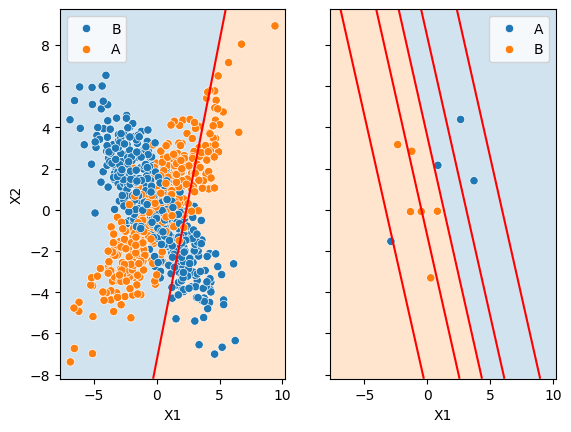

In [4]:
X = cross.iloc[:, :-1]
y = cross.iloc[:, -1]

lr_cross = LogisticRegression(penalty=None)
lr_cross.fit(X, y)

cross_sample = cross.sample(frac = 0.01)
X_ = cross_sample.iloc[:, :-1]
y_ = cross_sample.iloc[:, -1]

lr_cross_2 = LogisticRegression(penalty=None)
lr_cross_2.fit(X_, y_)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)

sns.scatterplot(x="X1", y="X2", hue="z", data=cross, ax=ax[0])
levels = [.1, .3, .5, .7, .9]
utils.add_decision_boundary(lr_cross, levels=levels, ax=ax[0])

sns.scatterplot(x="X1", y="X2", hue="z", data=cross_sample, ax=ax[1])
levels = [.1, .3, .5, .7, .9]
utils.add_decision_boundary(lr_cross_2, levels=levels, ax=ax[1])

C:\Users\antoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Contour plot, $p(y^*=1|x^*,X,y)$')

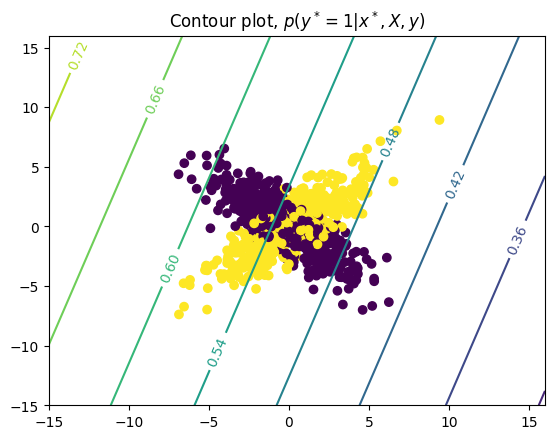

In [5]:
Gx, Gy = np.mgrid[-15:16:200j, -15:16:200j]
grid = np.stack([Gx, Gy], axis=-1)
fG = lr_cross.predict_proba(grid.reshape(-1, 2))[:, 1].reshape(*Gx.shape)
fig, ax = plt.subplots()
ax.scatter(X.X1, X.X2, c=(y=="A").astype(int))
CS = ax.contour(Gx, Gy, np.reshape(fG, Gx.shape))
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Contour plot, $p(y^*=1|x^*,X,y)$')

### 2.2 LR with regularization

C:\Users\antoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\antoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\antoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\antoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: UserWarn

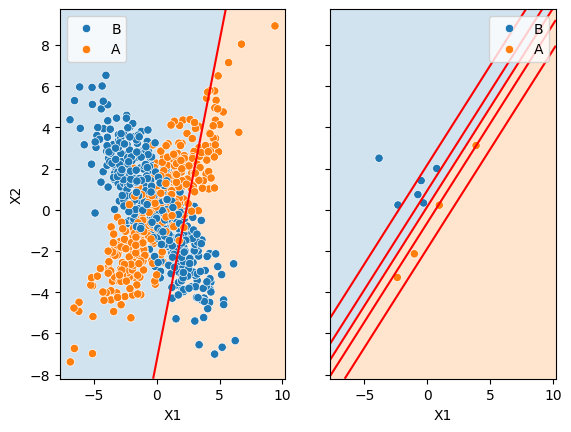

In [6]:
X = cross.iloc[:, :-1]
y = cross.iloc[:, -1]

lr_cross = LogisticRegression(penalty="l2")
lr_cross.fit(X, y)

cross_sample = cross.sample(frac = 0.01)
X_ = cross_sample.iloc[:, :-1]
y_ = cross_sample.iloc[:, -1]

lr_cross_2 = LogisticRegression(penalty="l2")
lr_cross_2.fit(X_, y_)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)

sns.scatterplot(x="X1", y="X2", hue="z", data=cross, ax=ax[0])
levels = [.1, .3, .5, .7, .9]
utils.add_decision_boundary(lr_cross, levels=levels, ax=ax[0])

sns.scatterplot(x="X1", y="X2", hue="z", data=cross_sample, ax=ax[1])
levels = [.1, .3, .5, .7, .9]
utils.add_decision_boundary(lr_cross_2, levels=levels, ax=ax[1])

## 3 Gaussian process classification

In [7]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import ConstantKernel as CK, RBF

In [50]:
n11 = spst.binom(n=20,p=0.5).rvs()
n12 = 20-n11
Xtr = np.concatenate((spst.norm(-2,1).rvs(size=n11),
spst.norm(2,1).rvs(size=n12),
spst.norm(0,1).rvs(size=20)),
axis=0)
#ytr = 2+np.sum(Xtr, axis=1)
ytr = np.concatenate((np.repeat(1,20),
np.repeat(0,20)))

Xpl = np.linspace(-5,5,100)

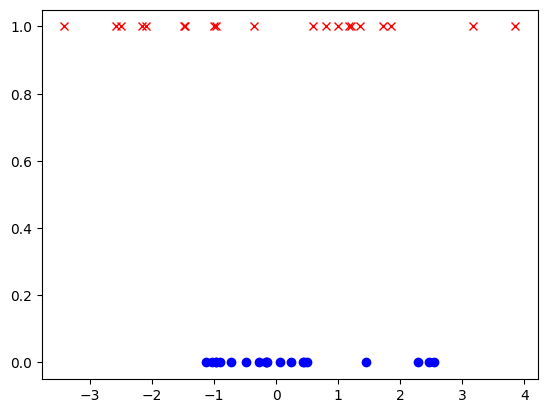

In [49]:
fig, ax = plt.subplots()
plt.plot(Xtr[ytr==0], ytr[ytr==0], 'bo')
plt.plot(Xtr[ytr==1], ytr[ytr==1], 'rx')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


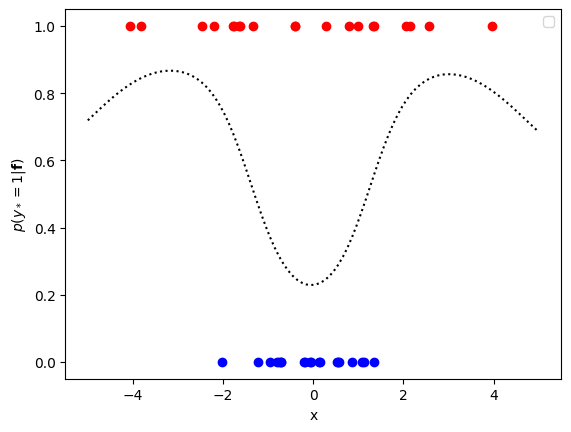

In [53]:
rbf = CK(1.0) * RBF(length_scale=1.0)
gpc = GaussianProcessClassifier(kernel=rbf)
gpc.fit(Xtr.reshape(-1,1), ytr)
gpc.predict_proba(Xpl.reshape(-1, 1))[:,1]

fig, ax = plt.subplots()
ax.plot(Xpl, gpc.predict_proba(Xpl.reshape(-1, 1))[:,1],
color='black', ls=':')
ax.scatter(Xtr[ytr==0], ytr[ytr==0], color='blue')
ax.scatter(Xtr[ytr==1], ytr[ytr==1], color='red')
plt.xlabel('x')
plt.ylabel('$p(y_*=1|\mathbf{f})$')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


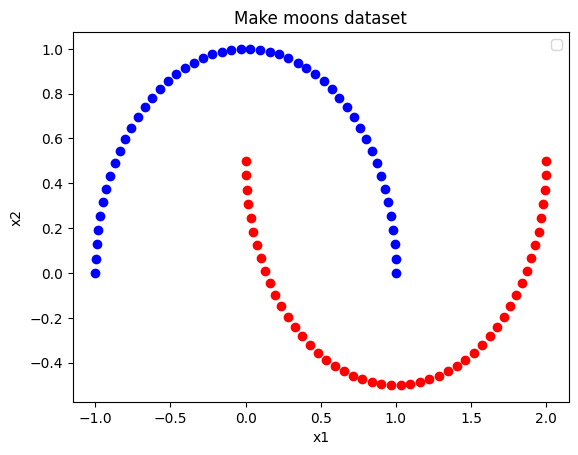

In [58]:
from sklearn.datasets import make_moons

X, y = make_moons()

fig, ax = plt.subplots()
ax.scatter(X[y==0,0], X[y==0,1], color='blue')
ax.scatter(X[y==1,0], X[y==1,1], color='red')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Make moons dataset")
plt.legend()


Text(0.5, 1.0, 'Contour plot, $p(y^*=1|x^*,X,y)$')

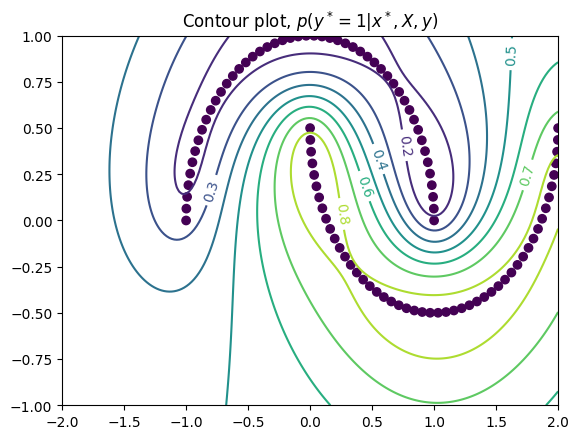

In [62]:
rbf = CK(1.0) * RBF(length_scale=1.0)
gpc = GaussianProcessClassifier(kernel=rbf)
gpc.fit(X, y)

Gx, Gy = np.mgrid[-2:2:200j, -1:1:200j]
grid = np.stack([Gx, Gy], axis=-1)
fG = gpc.predict_proba(grid.reshape(-1, 2))[:, 1].reshape(*Gx.shape)
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=(y=="A").astype(int))
CS = ax.contour(Gx, Gy, np.reshape(fG, Gx.shape))
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Contour plot, $p(y^*=1|x^*,X,y)$')